# Partie II - Analyse du jeux de donées sur les prêts  (prosperLoanData)
## Par Bienvenue Awagoum Ndjotsa

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.


## Dataset Overview
In this work, I make analysis of prosperLoanData ; my work have 3 mains parts
- Data Wrangling
- Exploratory Data analysis with univarietes, bivariates and multivariaes visualisation
- Explanatory Data analysis

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.


## Dataset Overview
In this work, I make analysis of prosperLoanData ; my work have 3 mains parts
- Data Wrangling
- Exploratory Data analysis with univarietes, bivariates and multivariaes visualisation
- Explanatory Data analysis

The original dataset have 113937 rows and 81 columns

> Structure of your dataset 
- First, I separate the original dataset in two part :  df1 which contains data from loans before July 2009 and df2 which contains data from loans after July 2009 
- At this spet, my dataset contains 76201 rows ;
- At this spet, I was interested in loans that are no longer current ('LoanStatus'='Current') and I obtained a dataset with 25031 rows

> For Features selection <br>
I select the variables we will work with in the following by removing the variables that are correlated to each other at more than 90% and less than 1%.
Then I have the following features :
- The Numerical Variables (11): 'Term', 'BorrowerAPR', 'EstimatedReturn', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TradesNeverDelinquentPercentage', 'DebtToIncomeRatio' , 'LoanOriginalAmount'.
- Categorical variables (10) : 'LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationQuarter'.
- Variables of type datetime (1) : 'FirstRecordedCreditLine

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", None)

In [2]:
# load in the dataset into a pandas dataframe
# We just read our clean dataset there
df2 = pd.read_csv('clean_prosperLoanData.csv')
print(df2.shape)
df2.head()

(25031, 20)


,Term,LoanStatus,EstimatedEffectiveYield,EstimatedReturn,ProsperRatingAlpha,ProsperScore,BorrowerState,Occupation,EmploymentStatus,FirstRecordedCreditLine,CurrentCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,DelinquenciesLast7Years,IncomeRange,LoanOriginationQuarter,DebtToIncomeRatio,LoanOriginalAmount,semester,year
0,36,Past Due (1-15 days),0.1264,0.0740,B,4,AL,Sales - Retail,Employed,1996-11-09,9.0,29.0,0.0,0.0,"$25,000-49,999",Q1 2014,0.18,4000,Q1,2014
1,36,Defaulted,0.2896,0.1246,HR,5,FL,Other,Other,1999-03-08,10.0,18.0,0.0,0.0,"$50,000-74,999",Q2 2012,0.49,4000,Q2,2012
2,36,Defaulted,0.2126,0.1051,D,5,IL,Skilled Labor,Employed,1998-06-09,7.0,34.0,0.0,0.0,"$25,000-49,999",Q2 2013,0.39,2000,Q2,2013
3,60,Completed,0.2473,0.1248,E,3,NY,Sales - Commission,Employed,1975-10-26,7.0,12.0,0.0,0.0,"$25,000-49,999",Q1 2013,0.11,4000,Q1,2013
4,36,Completed,0.0608,0.0608,A,9,CO,Executive,Full-time,2000-04-11,16.0,49.0,0.0,0.0,"$75,000-99,999",Q2 2010,0.26,4000,Q2,2010


## 1-Loan by IncomeRange

>The largest number of lenders belong to the middle class (annual salary between $ 50,000 and $74,999), followed by the lower middle class (annual salary between $24,999 and $50,000) and then the upper middle class (annual salary between $75,000 and $99,999)

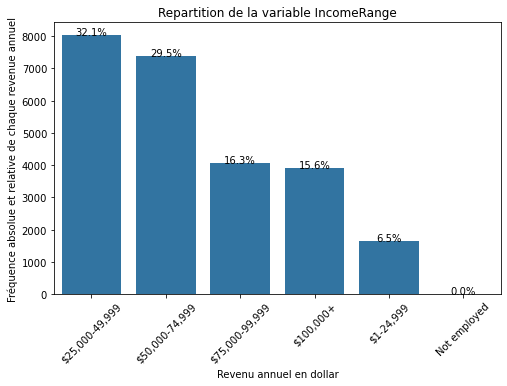

In [3]:
# Spécifier la taille de la figure en pouces, pour les axes X, et Y

# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
# Spécifier la taille de la figure en pouces, pour les axes X, et Y
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5
sb.countplot(data=df2, x='IncomeRange', color=base_color);

# Retourner la somme de toutes les valeurs non nulles de la colonne « ProsperRatingAlpha »
n_IncomeRange = df2['IncomeRange'].value_counts().sum()

# Recalculer les IncomeRange juste pour plus de clarté.
IncomeRange_counts = df2['IncomeRange'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=45)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = IncomeRange_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_IncomeRange)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.ylabel('Fréquence absolue et relative de chaque revenue annuel')
plt.xlabel('Revenu annuel en dollar')
plt.title('Repartition de la variable IncomeRange') ;

## 2- The semester with more activity
> The semesters with more loans are semester 4 (30.1%), followed by semester 1 (26.9%) and semester 3 (23.8%), it would be interesting to see the impact of this variable on the status of a loan in a multivariate faceted visualization (we will do so in the following)


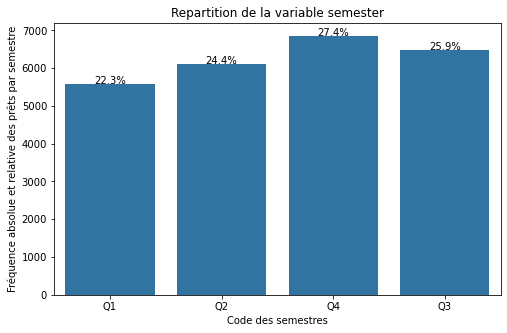

In [4]:
# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='semester', color=base_color);

# Retourner la somme de toutes les valeurs non nulles de la colonne « semester »
n_semester = df2['semester'].value_counts().sum()

# Recalculer les semester juste pour plus de clarté.
semester_counts = df2['semester'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=0)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = semester_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_semester)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.ylabel('Fréquence absolue et relative des prêts par semestre')
plt.xlabel('Code des semestres')
plt.title('Repartition de la variable semester') ;

## 3- Repartition of loan by EmploymentStatus
> Less than 5% of loans are given to people without a job, this should encourage lenders to get a job to increase their chances of receiving a loan

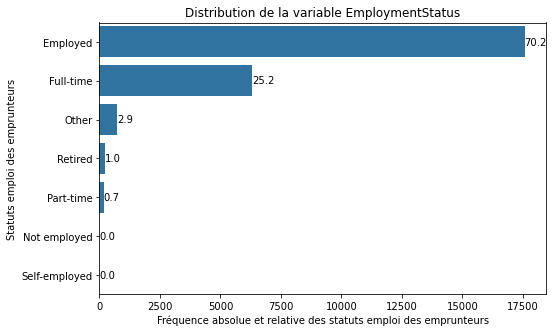

In [5]:
# Fixer la palette de couleur
base_color = sb.color_palette()[0]

plt.figure()
# Obtenir les effectifs de chaque colonne
var_counts = df2['EmploymentStatus'].value_counts()
# Obtenir les valeurs uniques de la colonne « EmploymentStatus » par ordre de fréquence décroissante.
var_order = var_counts.index
# Imprimer le texte (proportion) sur les barres de cahque graphique
sb.countplot(data=df2, y='EmploymentStatus', color=base_color, order=var_order);
# Logique pour imprimer le texte de proportion sur les barres
for i in range (var_counts.shape[0]):
    # var_counts contient la fréquence des valeurs uniques dans la colonne « col » par ordre décroissant.
    count = var_counts[i]
    # Obtenir l'effectif global du dataset
    n_loan = df2['EmploymentStatus'].value_counts().sum()
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.1f}'.format(100*count/n_loan)
    # Imprimer la valeur de la chaîne sur la barre.
    plt.text(count+1, i, pct_string, va='center')
plt.title('Distribution de la variable EmploymentStatus');
plt.xlabel('Fréquence absolue et relative des statuts emploi des emprunteurs');
plt.ylabel('Statuts emploi des emprunteurs');

## 4- Repartition of loan by occupations
> 24.3% of the loans are given to people whose occupation is not yet listed, **this calls for better work to list all the occupations**


In [6]:
# Spécifier la taille de la figure en pouces, pour les axes X, et Y
rcParams['figure.figsize'] = 16,4

# Choix de la palette des couleurs
base_color = sb.color_palette()[0]
# Obtenir l'effectif global du dataset
n_loan = df2['BorrowerState'].value_counts().sum()


In [7]:
# Définition d'une fonction pour visualiser les autres variables catégorielles
def display_cat_var(df,col):
    plt.figure()
    # Obtenir les effectifs de chaque colonne
    var_counts = df[col].value_counts()
    # Obtenir les valeurs uniques de la colonne « col » par ordre de fréquence décroissante.
    var_order = var_counts.iloc[:30].index # nous avons utiliser iloc[:30] pour n'afficher que les 30 catégories ayant les meilleurs effectifs afon d'avoir un visuel lisible
    # Graphique avec seaborn
    sb.countplot(data=df, x=col, color=base_color, order=var_order);
    # Recalculer les var_counts juste pour plus de clarté.
    var_counts = df[col].value_counts()
    # Obtenir les emplacements et les étiquettes des ticks actuels
    locs, labels = plt.xticks(rotation=90)
    # Boucler sur chaque paire d'emplacements et d'étiquettes
    for loc, label in zip(locs, labels):
        # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
        count = var_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_loan)
        # imprimer l'annotation juste en dessous du haut de la barre
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.ylabel('Fréquence relative (%)');
    plt.title('Distribution de la variable "{}"'.format(col))

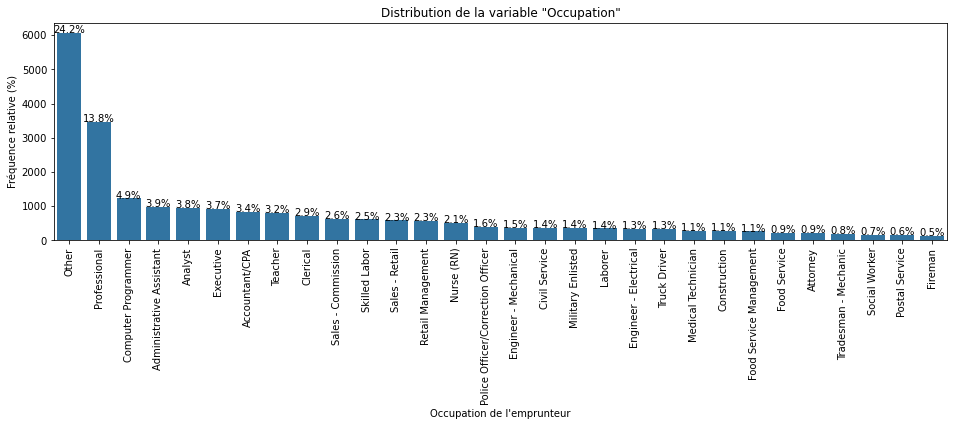

In [8]:
# Distribution de la variable Occupation
display_cat_var(df2,'Occupation')
plt.xlabel('Occupation de l\'emprunteur');

## 5- Repartition of loan by EmploymentStatus
> Less than 5% of loans are given to people without a job, **this should encourage lenders to get a job to increase their chances of receiving a loan**


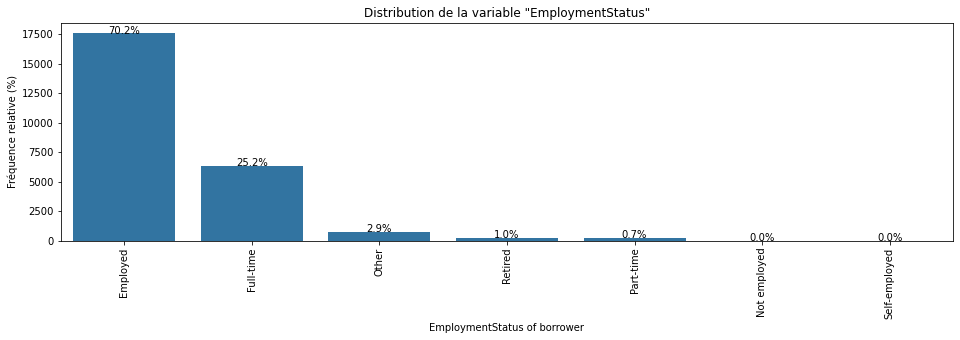

In [9]:
# Distribution de la variable EmploymentStatus
display_cat_var(df2,'EmploymentStatus')
plt.xlabel('EmploymentStatus of borrower');

## 6- Repartition of loan by occupations and Term
- Short-term loans (12 months) have the highest repayment rate
- Medium-term loans have a very high rate of late payment and default; they have the lowest rate of on-time repayment

In [10]:
# fonction pour  roter les axes du graphique facetté
def rotate_xticklabels():
    for axes in g.axes.flat :
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.tight_layout()

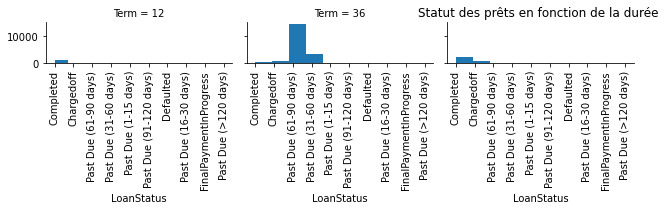

In [11]:
# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
# bin_edges = np.arange(12, df2.Term.max()+12, 6)
g = sb.FacetGrid(data = df2, col = 'Term' , col_wrap=3)
plt.xticks(rotation=90);
g.map(plt.hist, "LoanStatus");
# Pour roter les axes du graphique facetté
rotate_xticklabels()
plt.title('Statut des prêts en fonction de la durée ');

## 7 - Relationship between the status of the loans and the annual income of the lender (IncomeRange)
- Those with incomes in the \$1-24999 range have a very high default rate (over 60%)
- Those with incomes in the \$25000-49999 range have a very high (highest) rate of late payment
- Those with incomes in the $500,000-74,999 range have a very high default rate (above 60%)
- Those with incomes over 75,000 have the best on-time repayment rates

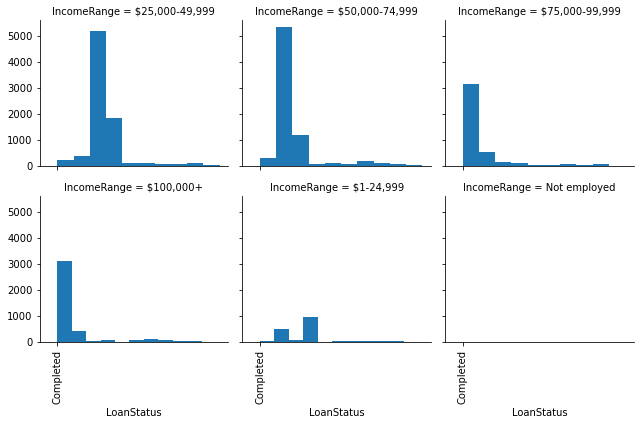

In [12]:
# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
g = sb.FacetGrid(data = df2, col = 'IncomeRange' , col_wrap=3)
g.map(plt.hist, "LoanStatus");
# Pour roter les axes du graphique facetté
rotate_xticklabels()

## 8- Relationship between EstimatedReturn and DebtToIncomeRatio by LoanStatus
The EstimatedReturn for the vast majority of loans is between 0.0 and 0.2

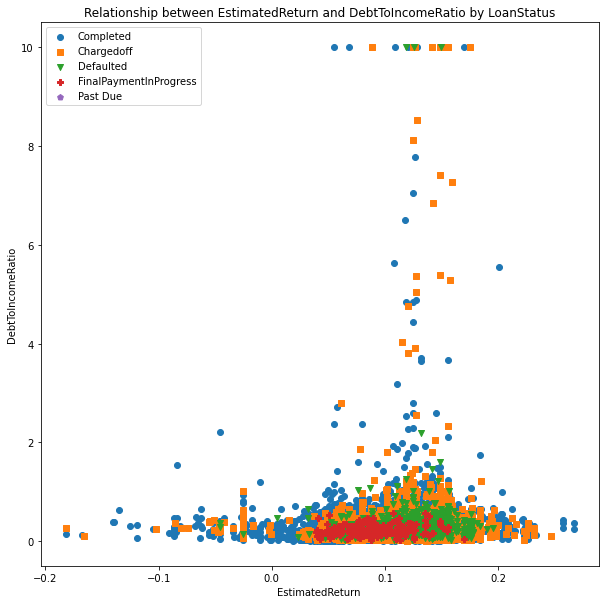

In [13]:
# multivariate plot of price by carat weight, and clarity
cat_markers = [
    ['Completed', 'o'],
    ['Chargedoff', 's'],
    ['Defaulted','v'],
    ['FinalPaymentInProgress','P'],
    ['Past Due','p']
]

bins_x = np.arange(0, df2['EstimatedReturn'].max()+0.2, 0.1) 
bins_y = np.arange(0, df2['DebtToIncomeRatio'].max()+1, 1)
plt.figure(figsize=(10,10))
for cat, marker in cat_markers:
    df_cat = df2[df2['LoanStatus'] == cat]
    plt.scatter(data = df_cat, x = 'EstimatedReturn', y = 'DebtToIncomeRatio', marker = marker)
plt.xlabel('EstimatedReturn ');
plt.ylabel('DebtToIncomeRatio');
plt.title('Relationship between EstimatedReturn and DebtToIncomeRatio by LoanStatus')
plt.legend(['Completed', 'Chargedoff', 'Defaulted', 'FinalPaymentInProgress', 'Past Due']);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [14]:
print('bjr')

bjr


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 